# cgl1 1-parameter Bifurcation Diagrams

diagram data from XPP. The file is `/xpp/cgl1.ode`, and the data is saved to `/bif_cgl1` with the file name...

`par1_nm_negative.dat`

`1` can be `2`, `nm` denotes n:m, `negative` can be `positive`.

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import cgl1 as c1
from lib.functions import g1,p

from lib.util import (get_phase, _get_sol,load_bif1d_f,load_phis_force)

from generate_figures import _full_cgl1, _cgl1_aut

from lib.rhs import _redu_c, _full, rhs_avg_1df
from lib.plot_util import (add_diagram_1d_scatter, quick_plot_combined,
                           add_diagram_full, add_diagram_1d,
                           load_diagram_full_f)

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
kw_sim = {'rtol':1e-9,'atol':1e-9,'method':'LSODA'}

In [3]:
kws1 = {'var_names':['x','y'],
        'init':np.array([1,0,2*np.pi]),
        'TN':2000,
        'idx':0,
        'model_name':'cglf0',
        'trunc_order':1,
        'recompute_list':[],
        'g_forward':False,
        'z_forward':False,
        'i_forward':[False,True,True,True,True,True,True],
        'i_bad_dx':[False,True,False,False,False,False,False],
        'max_iter':20,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'forcing_fn':[g1,lambda x:-20*g1(x+1)],
        #'forcing_fn':[np.cos,lambda x:20*np.cos(x+1)], # function or list. List if using higher-order terms
        #'forcing_fn':[lambda x:-np.cos(x),lambda x:20*np.cos(x+1)],
        'rhs':c1.rhs_old2}

In [4]:
pd_cgl_template = {'sig':.08,'rho':.12,'mu':1,'om':1,'om_fix':1}

In [5]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-10,'atol':1e-10}

## Defs

## Initialize Response Functions

In [6]:
system1 = rsp(**{'pardict':pd_cgl_template,**kws1})

mkdir ./data/cglf0/
* Loading LC data...
self.T 6.283185307179586 omfix 1.0000000000003393
* Loading monodromy...
* Floquet Exponent kappa =-0.15999999999969344
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


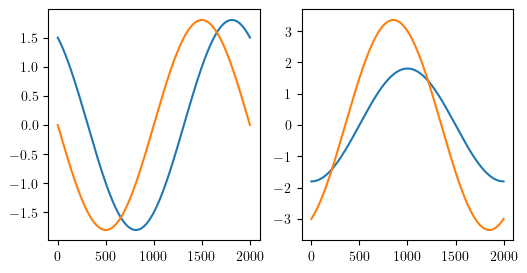

In [7]:
fig,axs = plt.subplots(1,2,figsize=(6,3))
for k in range(system1.miter):
    axs[0].plot(system1.z['dat'][k][:,0])

for k in range(system1.miter):
    axs[1].plot(system1.i['dat'][k][:,0])

# 1:1

In [8]:
recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_nm = {'system1':system1,'system2':None,'_n':('om0',1),'_m':('om1',1),
         'NH':500,'save_fig':False,'recompute_list':recompute_list}

## del=0.0

In [9]:
del11_p0 = .0
a11_p0 = nm.nmCoupling(**kw_nm, del1=del11_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
p order=0
* Computing H cglf0, order=0...
p order=1
system1 p f_imp1(th1)*ix0_0(th0) k= 1
* Computing H cglf0, order=1...


### H functions

In [10]:
# aa = a11_p0
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# if aa.system1.miter == 1:
#     axs = np.asarray([axs])
# etemp = .1
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(aa.x,h)
# plt.tight_layout()

### Newton summary

The workflow is as follows.

For a given eps, delta:
1. Obtain an initial guess for the solution using a given initial phase.
2. Run Newton's method to see if it converges or not
    * If it converges:
        1. Obtain the initial condition needed to start in the phase-locked state
        2. After all initial conditions are obtained, use `get_period_all` to get phase differences
    * If it does not converge:
        2. Pass or save nan.

### Plot 1par

In [12]:
etup = (.002,.21,.01)
out = load_bif1d_f(_full_cgl1,a11_p0,del11_p0,etup=etup)

In [13]:
erange = out[:,0]
inits = out[:,1:]

In [14]:
philist = load_phis_force(_full_cgl1,a11_p0,del11_p0,etup=etup,period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=11_d=0.0_elo=0.002_ehi=0.21_de=0.01.txt


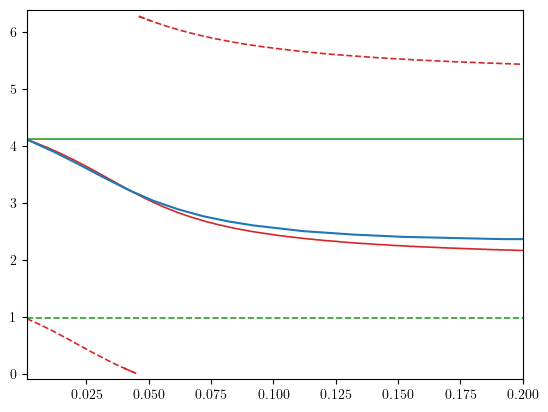

In [15]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a11_p0,del11_p0,(.001,.2,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a11_p0,del11_p0,(.001,.2,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [16]:
# coupling and init
eps11_p0 = .1
th_init11_p0 = 1

In [17]:
# sim params
dt = .01;T_p00=100
t11_p0 = np.arange(0,T_p00,dt)
args11_p0 = {'args':(a11_p0,eps11_p0,del11_p0),'t_eval':t11_p0,**kw_sim,'dense_output':True}

In [18]:
y0_p00 = a11_p0.system1.lc['dat'][int((th_init11_p0/(2*np.pi))*a11_p0.system1.TN),:]
args0 = [a11_p0,eps11_p0,del11_p0]

solf = _get_sol(_full_cgl1,y0_p00,t11_p0,args=args0,recompute=True)        
tp,fp = get_phase(t11_p0,solf,skipn=100,system1=a11_p0.system1)
force_phase = (a11_p0._m[1]+del11_p0)*tp
fp2 = np.mod(fp-a11_p0.om*force_phase,2*np.pi)

args0 = [a11_p0,eps11_p0,del11_p0]
args1 = {'t_eval':t11_p0,'t_span':[0,t11_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init11_p0],**args1)

args0 = [a11_p0,eps11_p0,del11_p0,1]
args1 = {'t_eval':t11_p0,'t_span':[0,t11_p0[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init11_p0],**args1)

### Plot Sims

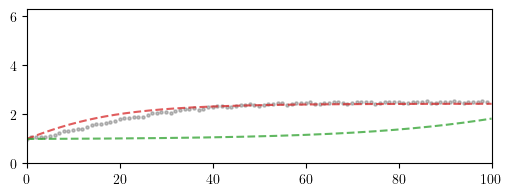

In [19]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p00)

# 1d solution over time
axs.plot(t11_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t11_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.05

In [20]:
del11_p1 = 0.05
a11_p1 = nm.nmCoupling(**kw_nm, del1=del11_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
p order=0
* Computing H cglf0, order=0...
p order=1
system1 p f_imp1(th1)*ix0_0(th0) k= 1
* Computing H cglf0, order=1...


### H functions

In [21]:
# aa = a11_p1
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# axs = np.asarray(axs)
# etemp = .5
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(h)
    
# plt.tight_layout()

### Plot 1par

In [22]:
etup = (.09,.2,.001)
out = load_bif1d_f(_full_cgl1,a11_p1,del11_p1,etup=etup,max_iter=20)

In [23]:
erange = out[:,0]
inits = out[:,1:]

In [24]:
philist = load_phis_force(_full_cgl1,a11_p1,del11_p1,etup=etup,period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=11_d=0.05_elo=0.09_ehi=0.2_de=0.001.txt


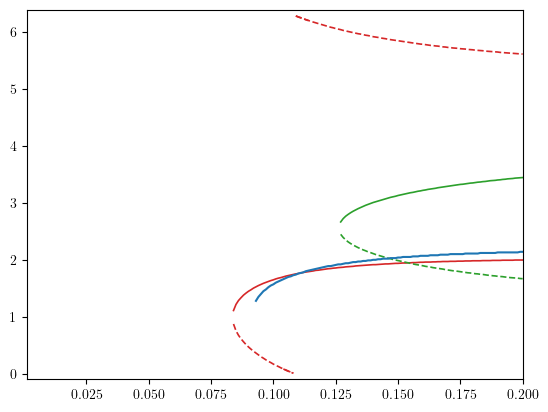

In [25]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a11_p1,del11_p1,(.001,.2,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a11_p1,del11_p1,(.001,.2,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [26]:
# coupling and init
eps11_p1 = 0.1
th_init11_p1 = 2

In [27]:
# sim params
dt = .01;T_p050=500
t11_p1 = np.arange(0,T_p050,dt)
args11_p1 = {'args':(a11_p1,eps11_p1,del11_p1),'t_eval':t11_p1,**kw_sim,'dense_output':True}

In [28]:
y0_p050 = a11_p1.system1.lc['dat'][int((th_init11_p1/(2*np.pi))*a11_p1.system1.TN),:]
args0 = [a11_p1,eps11_p1,del11_p1]

solf = _get_sol(_full_cgl1,y0_p050,t11_p1,args=args0,recompute=True)        
tp,fp = get_phase(t11_p1,solf,skipn=100,system1=a11_p1.system1)
force_phase = (a11_p1._m[1]+del11_p1)*tp
fp2 = np.mod(fp-a11_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t11_p1,'t_span':[0,t11_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init11_p1],**args1)

args0 = [a11_p1,eps11_p1,del11_p1,1]
args1 = {'t_eval':t11_p1,'t_span':[0,t11_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init11_p1],**args1)

### Plot Sim

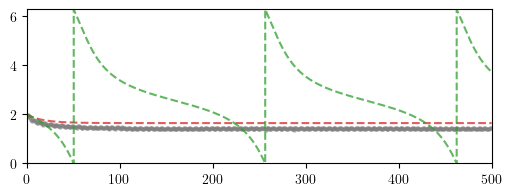

In [29]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p050)

# 1d solution over time
axs.plot(t11_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t11_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

# 2:1

In [30]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_nm = {'system1':system1,'system2':None,'_n':('om0',2),'_m':('om1',1),
         'NH':300,'save_fig':False,'recompute_list':recompute_list}

## del=0.01

In [31]:
del21_p0 = 0.0
a21_p0 = nm.nmCoupling(**kw_nm, del1=del21_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
p order=0
* Computing H cglf0, order=0...
p order=1
system1 p f_imp1(th1)*ix0_0(th0) k= 1
* Computing H cglf0, order=1...


### H functions

In [32]:
# aa = a21_p0
# fig,axs = plt.subplots(aa.system1.miter,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    
# plt.tight_layout()

### Plot 1par

In [33]:
out = load_bif1d_f(_full_cgl1,a21_p0,del21_p0,etup=(.002,.21,.01),max_iter=20)

In [34]:
erange = out[:,0]
inits = out[:,1:]

In [35]:
philist = load_phis_force(_full_cgl1,a21_p0,del21_p0,etup=(.002,.21,.01),period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=21_d=0.0_elo=0.002_ehi=0.21_de=0.01.txt


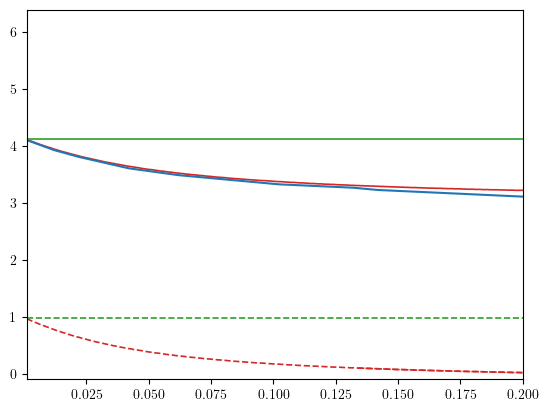

In [36]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a21_p0,del21_p0,(.001,.2,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a21_p0,del21_p0,(.001,.2,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [37]:
# coupling and init
eps21_p0 = 0.1
th_init21_p0 = 2

In [38]:
# sim params
dt = .01;T_p01=100
t21_p0 = np.arange(0,T_p01,dt)
args21_p0 = {'args':(a21_p0,eps21_p0,del21_p0),'t_eval':t21_p0,**kw_sim,'dense_output':True}

In [39]:
y0_p01 = a21_p0.system1.lc['dat'][int((th_init21_p0/(2*np.pi))*a21_p0.system1.TN),:]
args0 = [a21_p0,eps21_p0,del21_p0]

solf = _get_sol(_full_cgl1,y0_p01,t21_p0,args=args0,recompute=True)        
tp,fp = get_phase(t21_p0,solf,skipn=100,system1=a21_p0.system1)
force_phase = (a21_p0._m[1]+del21_p0)*tp
fp2 = np.mod(fp-a21_p0.om*force_phase,2*np.pi)

args1 = {'t_eval':t21_p0,'t_span':[0,t21_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init21_p0],**args1)

args0 = [a21_p0,eps21_p0,del21_p0,1]
args1 = {'t_eval':t21_p0,'t_span':[0,t21_p0[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init21_p0],**args1)

### Plot Sims

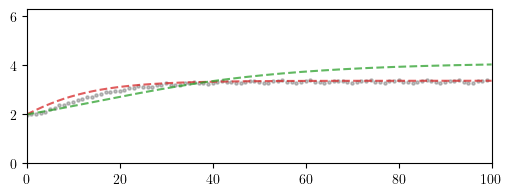

In [40]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p01)

# 1d solution over time
axs.plot(t21_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t21_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.025

In [41]:
del21_p1 = .025
a21_p1 = nm.nmCoupling(**kw_nm, del1=del21_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
p order=0
* Computing H cglf0, order=0...
p order=1
system1 p f_imp1(th1)*ix0_0(th0) k= 1
* Computing H cglf0, order=1...


### H functions

In [42]:
# aa = a21_p1
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# etemp = .01
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x)

# axs[-1].plot(h)
# plt.tight_layout()

### Plot 1par

In [43]:
out = load_bif1d_f(_full_cgl1,a21_p1,del21_p1,etup=(.070,.201,.001),max_iter=20)

In [44]:
erange = out[:,0]
inits = out[:,1:]

In [45]:
philist = load_phis_force(_full_cgl1,a21_p1,del21_p1,etup=(.070,.201,.001),period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=21_d=0.025_elo=0.07_ehi=0.201_de=0.001.txt


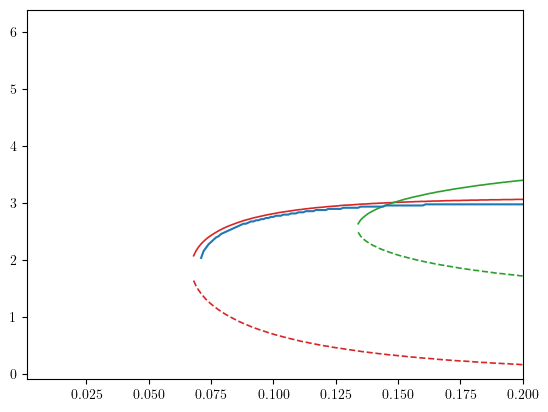

In [46]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a21_p1,del21_p1,(.001,.2,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a21_p1,del21_p1,(.001,.2,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [47]:
# coupling and init
eps21_p1 = 0.1
th_init21_p1 = 2

In [48]:
# sim params
dt = .01;T_p1=100
t21_p1 = np.arange(0,T_p1,dt)
args21_p1 = {'args':(a21_p1,eps21_p1,del21_p1),'t_eval':t21_p1,**kw_sim,'dense_output':True}

In [49]:
y0_p1 = a21_p1.system1.lc['dat'][int((th_init21_p1/(2*np.pi))*a21_p1.system1.TN),:]
args0 = [a21_p1,eps21_p1,del21_p1]

solf = _get_sol(_full_cgl1,y0_p1,t21_p1,args=args0,recompute=True)        
tp,fp = get_phase(t21_p1,solf,skipn=100,system1=a21_p1.system1)
force_phase = (a21_p1._m[1]+del21_p1)*tp
fp2 = np.mod(fp-a21_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t21_p1,'t_span':[0,t21_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init21_p1],**args1)

args0 = [a21_p1,eps21_p1,del21_p1,1]
args1 = {'t_eval':t21_p1,'t_span':[0,t21_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init21_p1],**args1)

### Plot Sims

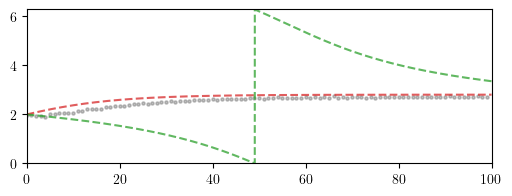

In [50]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p1)

# 1d solution over time
axs.plot(t21_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t21_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

# 3:1

In [51]:
#recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
recompute_list = []
kw_nm = {'system1':system1,'system2':None,'_n':('om0',3),'_m':('om1',1),
         'NH':300,'save_fig':False,'recompute_list':recompute_list}

## del=0

In [52]:
del31_p0 = 0.0
a31_p0 = nm.nmCoupling(**kw_nm, del1=del31_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
* Loading H cglf0, order=0...
* Loading H cglf0, order=1...


### H functions

In [53]:
# aa = a31_p0
# fig,axs = plt.subplots(aa.system1.miter,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    
# plt.tight_layout()

### Plot 1par

In [54]:
out = load_bif1d_f(_full_cgl1,a31_p0,del31_p0,etup=(.002,.21,.01),max_iter=50,recompute=False)

In [55]:
erange = out[:,0]
inits = out[:,1:]

In [56]:
philist = load_phis_force(_full_cgl1,a31_p0,del31_p0,etup=(.002,.21,.01),period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=31_d=0.0_elo=0.002_ehi=0.21_de=0.01.txt


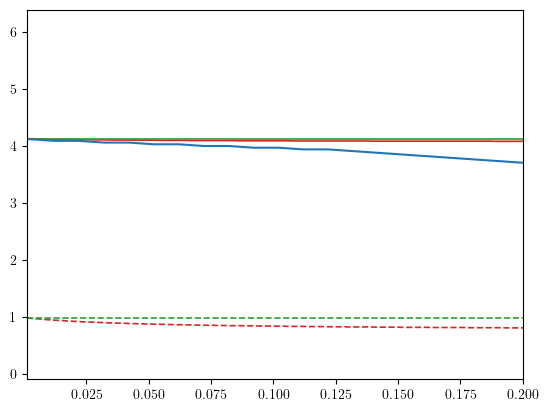

In [57]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a31_p0,del31_p0,(.001,.3,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a31_p0,del31_p0,(.001,.2,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [58]:
# coupling and init
eps31_p0 = 0.1
th_init31_p0 = 2

In [59]:
# sim params
dt = .01;T_p001=100
t31_p0 = np.arange(0,T_p001,dt)
args31_p0 = {'args':(a31_p0,eps31_p0,del31_p0),'t_eval':t31_p0,**kw_sim,'dense_output':True}

In [60]:
y0_p001 = a31_p0.system1.lc['dat'][int((th_init31_p0/(2*np.pi))*a31_p0.system1.TN),:]
args0 = [a31_p0,eps31_p0,del31_p0]

solf = _get_sol(_full_cgl1,y0_p001,t31_p0,args=args0,recompute=True)        
tp,fp = get_phase(t31_p0,solf,skipn=100,system1=a31_p0.system1)
force_phase = (a31_p0._m[1]+del31_p0)*tp
fp2 = np.mod(fp-a31_p0.om*force_phase,2*np.pi)

args1 = {'t_eval':t31_p0,'t_span':[0,t31_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init31_p0],**args1)

args0 = [a31_p0,eps31_p0,del31_p0,1]
args1 = {'t_eval':t31_p0,'t_span':[0,t31_p0[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init31_p0],**args1)

### Plot Sims

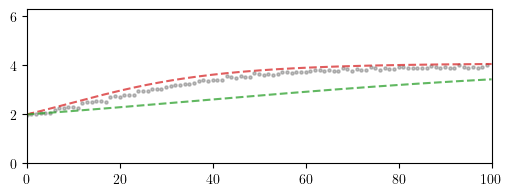

In [61]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p001)

# 1d solution over time
axs.plot(t31_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t31_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.008

In [62]:
del31_p1 = 0.008
a31_p1 = nm.nmCoupling(**kw_nm, del1=del31_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
* Loading H cglf0, order=0...
* Loading H cglf0, order=1...


### H functions

In [63]:
# aa = a31_p1
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x/3))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x/3)

# axs[-1].plot(h)
# plt.tight_layout()

### Plot 1par

In [64]:
out = load_bif1d_f(_full_cgl1,a31_p1,del31_p1,etup=(.067,.201,.001),max_iter=25)

In [65]:
erange = out[:,0]
inits = out[:,1:]

In [66]:
philist = load_phis_force(_full_cgl1,a31_p1,del31_p1,etup=(.067,.201,.001),period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=31_d=0.008_elo=0.067_ehi=0.201_de=0.001.txt


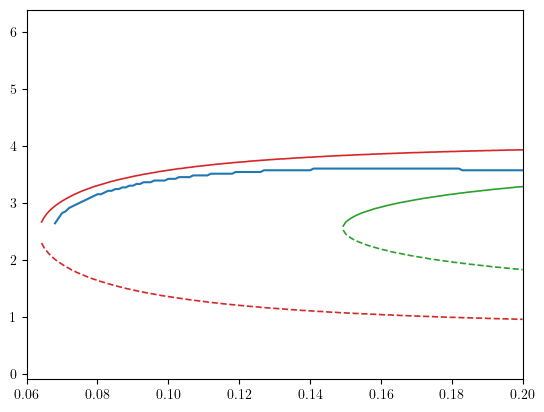

In [67]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a31_p1,del31_p1,(.06,.2,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a31_p1,del31_p1,(.06,.2,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [68]:
# coupling and init
eps31_p1 = 0.1
th_init31_p1 = 2

In [69]:
# sim params
dt = .01;T_p008=100
t31_p1 = np.arange(0,T_p008,dt)
args31_p1 = {'args':(a31_p1,eps31_p1,del31_p1),'t_eval':t31_p1,**kw_sim,'dense_output':True}

In [70]:
y0_p008 = a31_p1.system1.lc['dat'][int((th_init31_p1/(2*np.pi))*a31_p1.system1.TN),:]
args0 = [a31_p1,eps31_p1,del31_p1]

solf = _get_sol(_full_cgl1,y0_p008,t31_p1,args=args0,recompute=True)        
tp,fp = get_phase(t31_p1,solf,skipn=100,system1=a31_p1.system1)
force_phase = (a31_p1._m[1]+del31_p1)*tp
fp2 = np.mod(fp-a31_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t31_p1,'t_span':[0,t31_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init31_p1],**args1)

args0 = [a31_p1,eps31_p1,del31_p1,1]
args1 = {'t_eval':t31_p1,'t_span':[0,t31_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init31_p1],**args1)

### Plot Sims

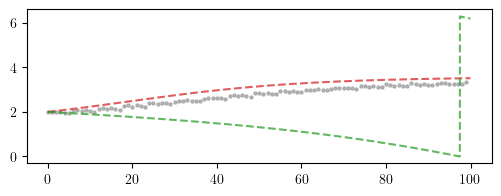

In [71]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')

axs.plot(t31_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t31_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

# 4:1

In [72]:
recompute_list = ['h_data_cglf0','h_cglf0','p_cglf0','p_data_cglf0','k_cglf0','k_cglf1']
#recompute_list = []
kw_nm = {'system1':system1,'system2':None,'_n':('om0',4),'_m':('om1',1),
         'NH':500,'save_fig':False,'recompute_list':recompute_list}

## del=0.0

In [73]:
del41_p0 = 0.0
a41_p0 = nm.nmCoupling(**kw_nm, del1=del41_p0)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
p order=0
* Computing H cglf0, order=0...
p order=1
system1 p f_imp1(th1)*ix0_0(th0) k= 1
* Computing H cglf0, order=1...


### H functions

In [74]:
# aa = a41_p0
# fig,axs = plt.subplots(aa.system1.miter+1,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,aa.system1.h['lam'][k](aa.x/4))
#     h += etemp**(k+1)*aa.system1.h['lam'][k](aa.x/4)

# axs[-1].plot(h)
# plt.tight_layout()

### Plot 1par

In [75]:
out = load_bif1d_f(_full_cgl1,a41_p0,del41_p0,etup=(.002,.11,.01),max_iter=50)

In [76]:
erange = out[:,0]
inits = out[:,1:]

In [77]:
philist = load_phis_force(_full_cgl1,a41_p0,del41_p0,etup=(.002,.11,.01),period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=41_d=0.0_elo=0.002_ehi=0.11_de=0.01.txt


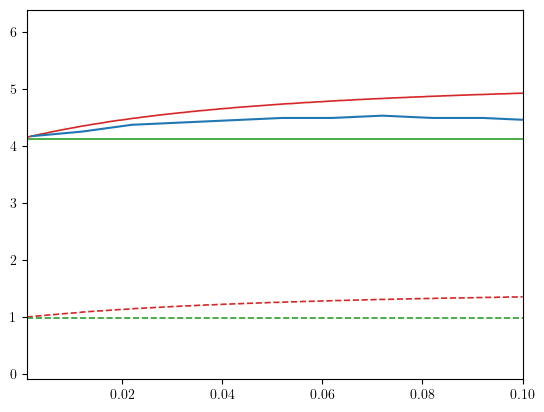

In [78]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a41_p0,del41_p0,(.001,.1,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a41_p0,del41_p0,(.001,.1,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [79]:
# coupling and init
eps41_p0 = 0.06
th_init41_p0 = 2

In [80]:
# sim params
dt = .01;T_p01=100
t41_p0 = np.arange(0,T_p01,dt)
args41_p0 = {'args':(a41_p0,eps41_p0,del41_p0),'t_eval':t41_p0,**kw_sim,'dense_output':True}

In [81]:
y0_p01 = a41_p0.system1.lc['dat'][int((th_init41_p0/(2*np.pi))*a41_p0.system1.TN),:]
args0 = [a41_p0,eps41_p0,del41_p0]

solf = _get_sol(_full_cgl1,y0_p01,t41_p0,args=args0,recompute=True)        
tp,fp = get_phase(t41_p0,solf,skipn=100,system1=a41_p0.system1)
force_phase = (a41_p0._m[1]+del41_p0)*tp
fp2 = np.mod(fp-a41_p0.om*force_phase,2*np.pi)

args1 = {'t_eval':t41_p0,'t_span':[0,t41_p0[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init41_p0],**args1)

args0 = [a41_p0,eps41_p0,del41_p0,1]
args1 = {'t_eval':t41_p0,'t_span':[0,t41_p0[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init41_p0],**args1)

### Plot Sims

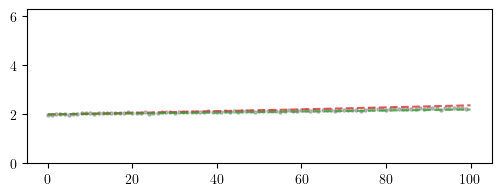

In [82]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)

# 1d solution over time
axs.plot(t41_p0,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t41_p0,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')

## del=0.0007

In [83]:
del41_p1 = 0.0007
a41_p1 = nm.nmCoupling(**kw_nm, del1=del41_p1)

u expr eps**2*f2 + eps*f1
tmp eps**3*f2*i_cglf0_x0[1]*p_cglf0[1] + eps**2*(f1*i_cglf0_x0[1]*p_cglf0[1] + f2*i_cglf0_x0[0]) + eps*f1*i_cglf0_x0[0]
p sym k 0
p sym k f_imp1(th1)*ix0_0(th0)
h sym 0 f_imp1(th1)*zx0_0(th0)
h sym 1 f_imp1(th1)*zx0_1(th0)*p_cglf0[1] + f_imp2(th1)*zx0_0(th0)
* Loading p...
p order=0
* Computing H cglf0, order=0...
p order=1
system1 p f_imp1(th1)*ix0_0(th0) k= 1
* Computing H cglf0, order=1...


### H functions

In [84]:
# aa = a41_p1
# fig,axs = plt.subplots(aa.system1.miter,1,figsize=(6,3))
# etemp = .05
# h = 0
# for k in range(aa.system1.miter):
#     axs[k].plot(aa.x,etemp**(k+1)*aa.system1.h['lam'][k](aa.x))
    
# plt.tight_layout()

### Plot

In [85]:
out = load_bif1d_f(_full_cgl1,a41_p1,del41_p1,etup=(.045,.101,.001),max_iter=50)

In [86]:
erange = out[:,0]
inits = out[:,1:]

In [87]:
philist = load_phis_force(_full_cgl1,a41_p1,del41_p1,etup=(.045,.101,.001),period_multiple=10)

fname_inits /Users/youngmp/Library/CloudStorage/Dropbox-Personal/projects/nm_phase_locking/code_and_data/jupyter/bifdat/bif1_inits_cglf0_ratio=41_d=0.0007_elo=0.045_ehi=0.101_de=0.001.txt


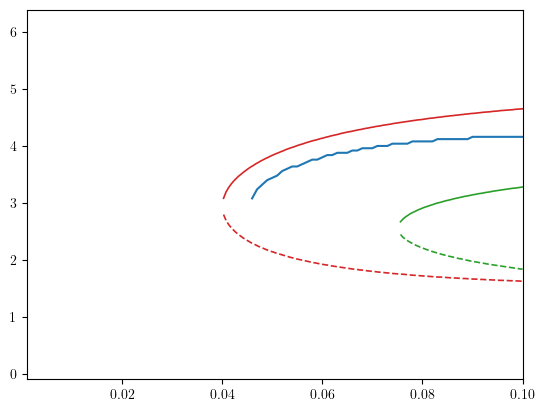

In [88]:
fig,axs = plt.subplots(figsize=(4,2))

add_diagram_1d(axs,a41_p1,del41_p1,(.001,.1,200),rhs=rhs_avg_1df)
add_diagram_1d(axs,a41_p1,del41_p1,(.001,.1,200),rhs=rhs_avg_1df,miter=1,color='tab:green')

axs.plot(erange,np.mod(-philist,2*np.pi))

### Sims

In [89]:
# coupling and init
eps41_p1 = 0.06
th_init41_p1 = 3

In [90]:
# sim params
dt = .01;T_p01=5000
t41_p1 = np.arange(0,T_p01,dt)
args41_p1 = {'args':(a41_p1,eps41_p1,del41_p1),
             't_eval':t41_p1,**kw_sim,'dense_output':True}

In [91]:
y0_p01 = a41_p1.system1.lc['dat'][int((th_init41_p1/(2*np.pi))*a41_p1.system1.TN),:]
args0 = [a41_p1,eps41_p1,del41_p1]

solf = _get_sol(_full_cgl1,y0_p01,t41_p1,args=args0,recompute=True)        
tp,fp = get_phase(t41_p1,solf,skipn=100,system1=a41_p1.system1)
force_phase = (a41_p1._m[1]+del41_p1)*tp
fp2 = np.mod(fp-a41_p1.om*force_phase,2*np.pi)

args1 = {'t_eval':t41_p1,'t_span':[0,t41_p1[-1]],'args':(*args0,),**kw_sim}
solr1d = solve_ivp(rhs_avg_1df,y0=[th_init41_p1],**args1)

args0 = [a41_p1,eps41_p1,del41_p1,1]
args1 = {'t_eval':t41_p1,'t_span':[0,t41_p1[-1]],'args':(*args0,),**kw_sim}
solr1d0 = solve_ivp(rhs_avg_1df,y0=[th_init41_p1],**args1)

### Plot Sims

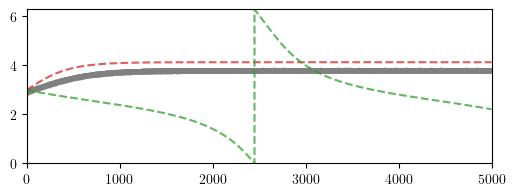

In [92]:
fig,axs = plt.subplots(1,1,figsize=(6,2))

# plot full sol
axs.scatter(tp,fp2,s=5,color='gray',alpha=.5,label='Full')
axs.set_ylim(0,2*np.pi)
axs.set_xlim(0,T_p01)

# 1d solution over time
axs.plot(t41_p1,np.mod(solr1d.y.T[:,0],2*np.pi),color='tab:red',alpha=.75,label='1D',ls='--')
axs.plot(t41_p1,np.mod(solr1d0.y.T[:,0],2*np.pi),color='tab:green',alpha=.75,label='1D',ls='--')